In [16]:
import glob
import numpy                         as     np
import pylab                         as     pl
import astropy.io.fits               as     fits
 
from   astropy.table                 import Table, vstack
from   desitarget.sv1.sv1_targetmask import desi_mask, bgs_mask, mws_mask, scnd_mask

# Clauds LBGs

In [3]:
def gather_tile(tileid):
    files  = glob.glob('/global/cscratch1/sd/mjwilson/DESILBGSPEC/June21/{}/v2.1/zbest-?-{}.fits'.format(tileid, tileid))
    files  = [fits.open(x) for x in files] 
    
    zbests = [Table(x['ZBEST'].data) for x in files]
    zbests = vstack(zbests)
    
    fmaps  = [Table(x['FIBERMAP'].data) for x in files]
    fmaps  = vstack(fmaps) 
    
    return {tileid: [zbests, fmaps]}

In [4]:
results = {}

In [5]:
results.update(gather_tile(80871))

In [6]:
results.update(gather_tile(80872))

In [7]:
results[80871][0]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,NUMEXP,NUMTILE
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int32,int32
142180031135753,10471.036423683167,-43.921716468934974 .. -2.490944226207713,1.5369537206519701,8.664036028973614e-05,0,7178,GALAXY,,10,13.386470541357994,0,0
142180035330050,8.999999999999996e+99,0.0 .. 0.0,-0.0019957014509158224,4.131159871613317e-48,1570,0,STAR,K,5,1.942668892225729e+84,0,0
142180035330056,12011.545555055141,-20.67545144627423 .. -1.3497943065784597,1.0205930552705038,5.119563439193051e-05,0,7180,GALAXY,,10,134.08091583848,0,0
142180035330057,17839.493995189667,23.2037363709427 .. -1.4690512128406314,0.3709178018668075,6.4519380596439146e-06,0,7178,GALAXY,,10,691.3609735071659,0,0
142180039524357,13443.884134918451,-28.59509348947614 .. 1.5946448104616018,0.9976243438926072,6.932274459478927e-05,4,7179,GALAXY,,10,0.8115790784358978,0,0
142186075127808,12570.407187104225,26.584063125941714 .. 0.5073719260967015,1.0186477562961114,5.955022251074018e-05,4,7179,GALAXY,,10,3.075643762946129,0,0
142186075127813,12862.059021353722,-60.027759702466014 .. -2.4508421387106663,1.239672503188519,4.657108573007699e-05,0,7179,GALAXY,,10,9.634339094161987,0,0
142186075127814,15301.799478404224,-19.629547629382035 .. 1.4666071696823282,0.9901336969262204,0.00014212387286954755,0,7178,GALAXY,,10,12.291412599384785,0,0
142186075127817,13394.816432982683,9.248738934784866 .. -2.8242548155725644,1.0588609257656778,6.510609247109675e-05,0,7175,GALAXY,,10,111.78583186864853,0,0


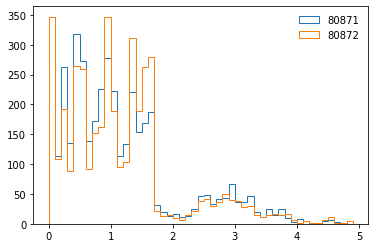

In [8]:
pl.hist(results[80871][0]['Z'], bins=np.arange(0.0, 5.0, 0.1), histtype='step', label='80871')
pl.hist(results[80872][0]['Z'], bins=np.arange(0.0, 5.0, 0.1), histtype='step', label='80872')

pl.legend(frameon=False)

In [17]:
np.count_nonzero((results[80871][0]['Z'] > 2.0) & ((results[80871][0]['DELTACHI2'] > 15.0))), np.count_nonzero(((results[80871][0]['DELTACHI2'] > 15.0)))

(449, 2937)

In [18]:
np.count_nonzero((results[80872][0]['Z'] > 2.0) & ((results[80872][0]['DELTACHI2'] > 15.0))), np.count_nonzero(((results[80872][0]['DELTACHI2'] > 15.0)))

(385, 3135)

In [19]:
# DESILBG_TMG_FINAL, DESILBG_BXU_FINAL, DESILBG_G_FINAL.
np.count_nonzero((results[80871][1]['SV1_SCND_TARGET'] & scnd_mask['DESILBG_TMG_FINAL']) != 0)

931

In [59]:
np.count_nonzero((results[80871][1]['SV1_SCND_TARGET'] & scnd_mask['DESILBG_BXU_FINAL']) != 0)

1221

In [60]:
np.count_nonzero((results[80871][1]['SV1_SCND_TARGET'] & scnd_mask['DESILBG_G_FINAL']) != 0)

842

In [20]:
842 + 1221 + 931

2994

# Done.